# Car classifier

Based on the fast.ai course Lesson1, try building a car classifier and test its accuracy 

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.vision import *
from fastai.metrics import error_rate

In [7]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Stanford Cars Dataset](https://ai.stanford.edu/~jkrause/cars/car_dataset.html) by [J. Krause et al., 2013](https://ai.stanford.edu/~jkrause/papers/3drr13.pdf) which features 196 classes of cars. Our model will need to learn to differentiate between these 196 distinct categories. According to their paper, the best accuracy they could get in 2013 was 94.5%. 

Download the stanford cars image dataset to the destination folder using kaggle API

In [19]:
img_dir='/home/jupyter/.fastai/data/car_data/car_data'
path=Path(img_dir)
data = ImageDataBunch.from_folder(path, valid_pct = 0.2, ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

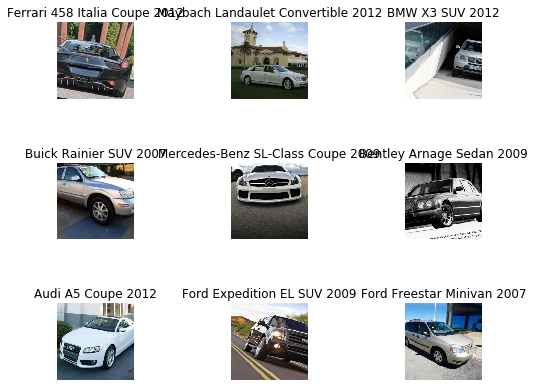

In [20]:
data.show_batch(rows=3, figsize=(15,15))

Check the labels for first few images 

In [23]:
len(data.classes)
data.classes[0:10]

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012']

## Training: resnet34

In [24]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [25]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [26]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.772399,3.297027,0.756874,01:41
1,3.201599,2.275173,0.582638,01:45
2,2.391313,1.793830,0.462465,01:44
3,2.015001,1.715718,0.432190,01:45


In [28]:
learn.save('stage-1')

## Results

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

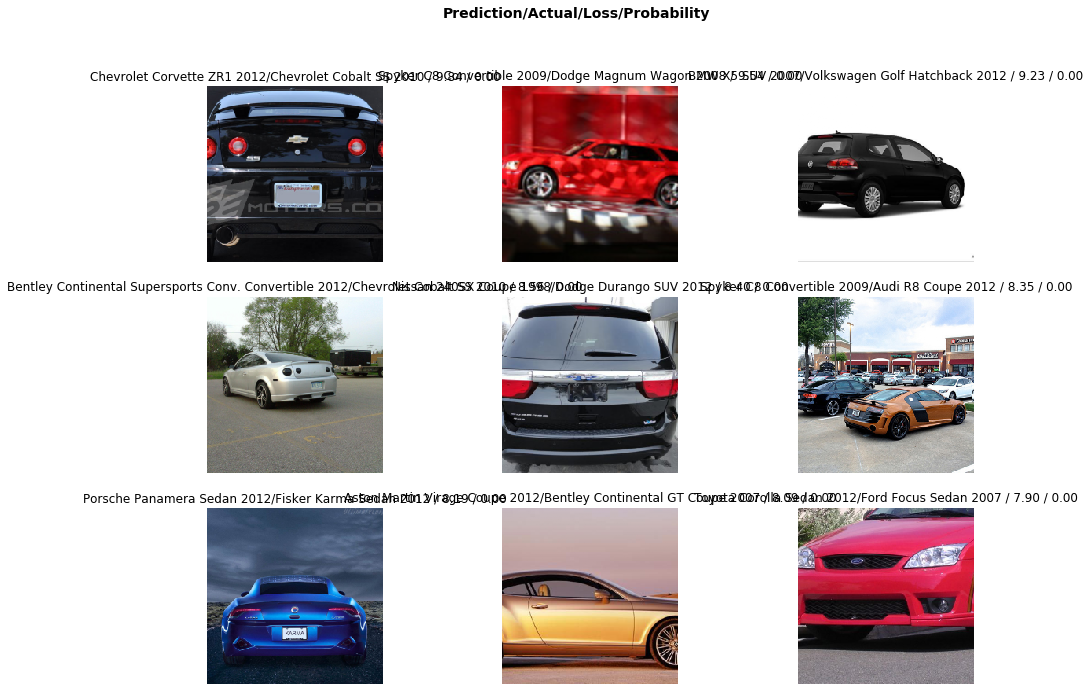

In [32]:
interp.plot_top_losses(9, figsize=(15,11))

In [34]:
interp.most_confused(min_val=2)

[('Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  7),
 ('Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 6),
 ('Bentley Continental GT Coupe 2007',
  'Bentley Continental Flying Spur Sedan 2007',
  6),
 ('GMC Savana Van 2012', 'Chevrolet Express Cargo Van 2007', 6),
 ('Audi TT Hatchback 2011', 'Audi TTS Coupe 2012', 5),
 ('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 5),
 ('Mercedes-Benz Sprinter Van 2012', 'Dodge Sprinter Cargo Van 2009', 5),
 ('Acura TSX Sedan 2012', 'Acura TL Sedan 2012', 4),
 ('Audi A5 Coupe 2012', 'Audi S5 Coupe 2012', 4),
 ('Audi RS 4 Convertible 2008', 'Audi S5 Convertible 2012', 4),
 ('Audi TT RS Coupe 2012', 'Audi TT Hatchback 2011', 4),
 ('Audi V8 Sedan 1994', 'Volvo 240 Sedan 1993', 4),
 ('Bentley Mulsanne Sedan 2011', 'Bentley Arnage Sedan 2009', 4),
 ('Bugatti Veyron 16.4 Convertible 2009', 'Bugatti Veyron 16.4 Coupe 2009', 4),
 ('Bugatti Veyron 16.4 Coupe 2009', 'Bugatti Veyron 16.4 Convertible 2009

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [35]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.880213,1.161479,0.307074,01:42


In [37]:
learn.load('stage-1');

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


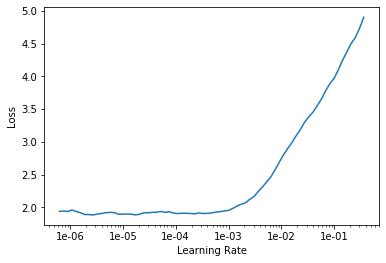

In [39]:
learn.recorder.plot()